In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("./resources/vgames_clean.csv").drop('Unnamed: 0', axis=1)
df.head()

,game,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,grand-theft-auto-v,Action,M,PS3,Rockstar Games,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,grand-theft-auto-v,Action,M,PS4,Rockstar Games,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,call-of-duty-black-ops,Shooter,M,X360,Activision,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


In [4]:
X = df.drop("Critic_Score", axis=1)
X = pd.get_dummies(X)
X.head()

,Unnamed: 0,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,"game_ eevee""","game_ my love""","game_ pikachu""",...,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games
0,19,20.32,6.37,9.85,0.99,3.12,2013.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,19.39,6.06,9.71,0.60,3.02,2014.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,16.15,8.41,5.49,0.47,1.78,2002.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,14.82,9.07,4.29,0.13,1.33,2011.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,14.74,9.76,3.73,0.11,1.14,2010.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df["Critic_Score"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [8]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[ 1.3344896 , -0.58333262, -0.55182392, ..., -0.05555556,
        -0.03204207, 11.75949464],
       [ 1.02962075, -0.56036157, -0.53285287, ..., -0.05555556,
        -0.03204207, -0.08503767],
       [ 1.35583644, -0.58333262, -0.47593974, ..., -0.05555556,
        -0.03204207, -0.08503767],
       ...,
       [ 1.00075742, -0.56036157, -0.49491078, ..., -0.05555556,
        -0.03204207, -0.08503767],
       [-0.99472049,  0.43198759,  0.54849669, ..., -0.05555556,
        -0.03204207, -0.08503767],
       [ 0.83779991, -0.54657895, -0.52336735, ..., -0.05555556,
        -0.03204207, -0.08503767]])

k: 1, Train/Test Score: 1.000/-0.292
k: 3, Train/Test Score: 0.572/-0.190
k: 5, Train/Test Score: 0.375/-0.144
k: 7, Train/Test Score: 0.227/-0.181
k: 9, Train/Test Score: 0.154/-0.145
k: 11, Train/Test Score: 0.119/-0.138
k: 13, Train/Test Score: 0.087/-0.117
k: 15, Train/Test Score: 0.053/-0.111
k: 17, Train/Test Score: 0.033/-0.088
k: 19, Train/Test Score: 0.030/-0.073


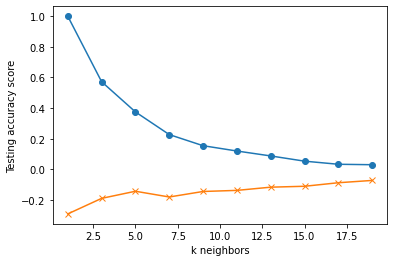

In [9]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [19]:
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: -0.073


In [17]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)
y_pred

array([6.87894737, 7.27368421, 7.14210526, 7.32631579, 7.22631579,
       7.05789474, 7.29473684, 7.21578947, 7.18947368, 6.97894737,
       7.04210526, 7.25789474, 6.88421053, 6.88421053, 7.04736842,
       7.37894737, 6.9       , 6.86842105, 7.42631579, 7.38421053,
       7.25263158, 7.06842105, 6.9       , 6.93684211, 6.85789474,
       6.79473684, 7.26842105, 7.48947368, 7.48947368, 7.54210526,
       6.89473684, 7.25789474, 7.54736842, 7.5       , 7.18947368,
       7.66842105, 6.91578947, 6.84210526, 6.73157895, 7.06315789,
       7.38421053, 7.06842105, 6.98421053, 6.81052632, 6.84210526,
       7.23157895, 7.15263158, 7.25789474, 7.15263158, 6.77894737,
       6.77368421, 6.99473684, 6.88421053, 7.28421053, 7.3       ,
       6.89473684, 6.88421053, 6.88421053, 7.1       , 6.75263158,
       7.21052632, 6.84210526, 6.87894737, 6.98421053, 7.04210526,
       7.02105263, 7.35263158, 7.54736842, 7.16315789, 7.14210526,
       7.07894737, 7.17894737, 7.1       , 6.56842105, 7.15789